In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
try:
    df = pd.read_csv("Nipah_Virus_dataset_File/cleaned_data.csv")
    df.head()
except FileExistsError as e:
    print(f"e")

,Unnamed: 0,age,gender,temperature,oxygen_level,heart_rate,days_sick,fever,headache,cough,...,breathing_problem,body_pain,confusion_sleepy,fits,contact_patient,outbreak_visit,bat_or_fruit_contact,date_sap_drink,pig_or_bat_contact,nipah_result
0,0,35,other,37.40,96.0,85.00,4.0,no,no,yes,...,no,no,no,no,no,no,no,no,no,1
1,1,52,female,37.70,95.0,90.00,4.0,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,0
2,2,13,female,37.30,99.0,89.16,4.0,no,no,no,...,no,no,yes,no,no,yes,no,no,no,0
3,3,16,other,37.87,95.0,75.00,4.0,no,no,no,...,no,no,no,no,no,no,no,no,no,0
4,4,60,other,39.00,88.0,96.00,6.0,yes,no,no,...,yes,yes,no,no,no,yes,no,no,no,1


In [3]:
#check there is any null values or not.
df.isna().sum()

Unnamed: 0              0
age                     0
gender                  0
temperature             0
oxygen_level            0
heart_rate              0
days_sick               0
fever                   0
headache                0
cough                   0
throat_pain             0
vomiting                0
breathing_problem       0
body_pain               0
confusion_sleepy        0
fits                    0
contact_patient         0
outbreak_visit          0
bat_or_fruit_contact    0
date_sap_drink          0
pig_or_bat_contact      0
nipah_result            0
dtype: int64

In [4]:
#Remove one unwanted column.
df.drop(columns=["Unnamed: 0"],inplace=True)

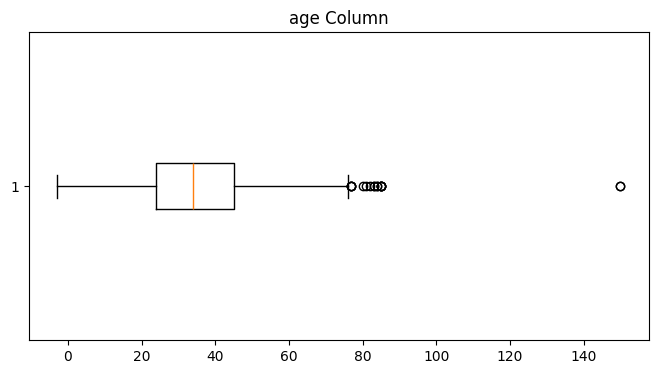

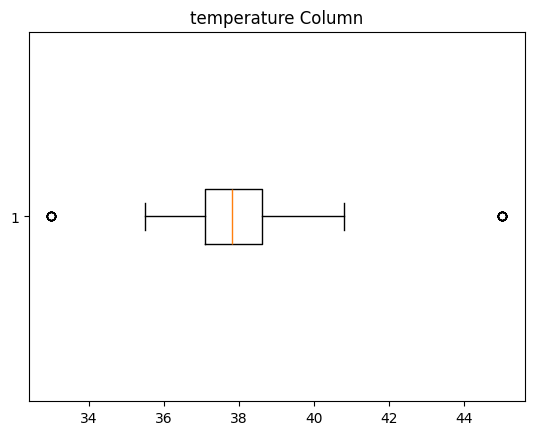

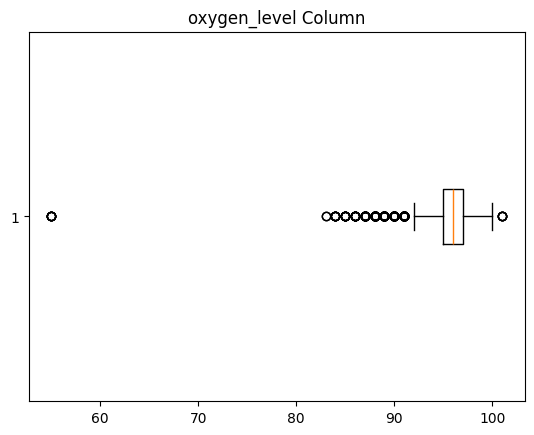

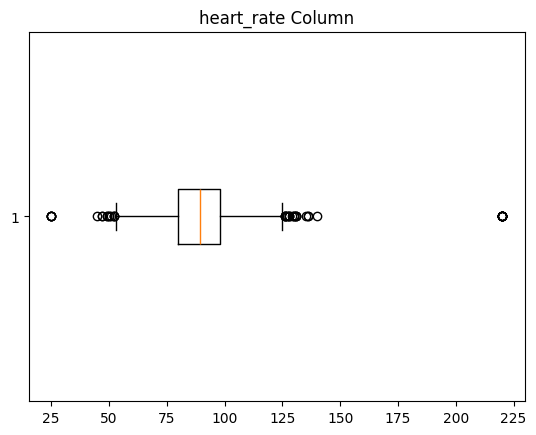

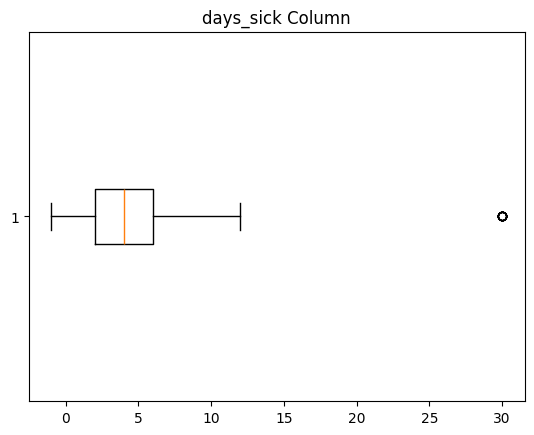

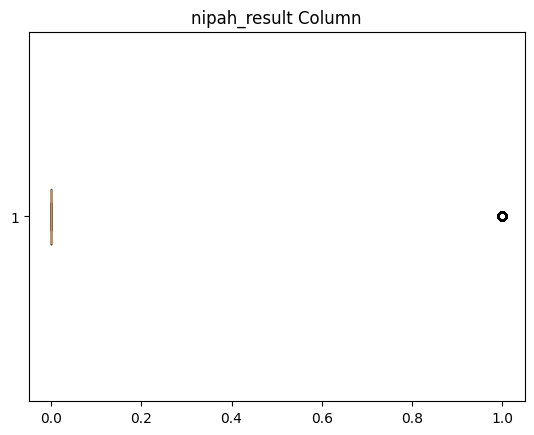

In [5]:
#Lets check there is have any OutLier or not.

#make one list of the all the columns.
column_list = ['age','temperature', 'oxygen_level', 'heart_rate',
       'days_sick','nipah_result']

plt.figure(figsize=(8,4))
for i in column_list:
    plt.boxplot(df[i], vert=False)
    plt.title(f"{i} Column")
    plt.savefig(f"OutLiers_graphs/Before_ourliers/{i}_outliers.png",dpi=100,bbox_inches='tight')
    plt.show()

In [6]:
#Lets remove the OutLiers from this datasets.
#We are use the IQR method for this.

column_list_for_outliers = ['age','temperature', 'oxygen_level', 'heart_rate']

for i in column_list_for_outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3-q1

    min_range = q1 - (1.5*IQR)
    max_range = q3 + (1.5*IQR)

    df = df[(df[i] >= min_range) & (df[i] <= max_range)]
    

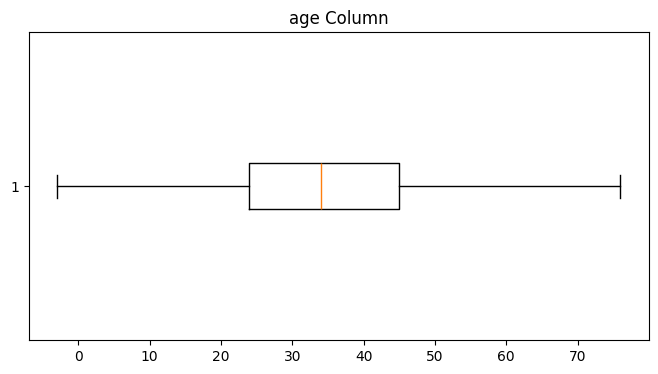

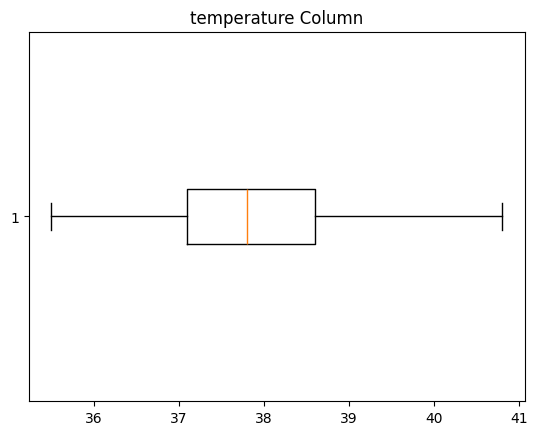

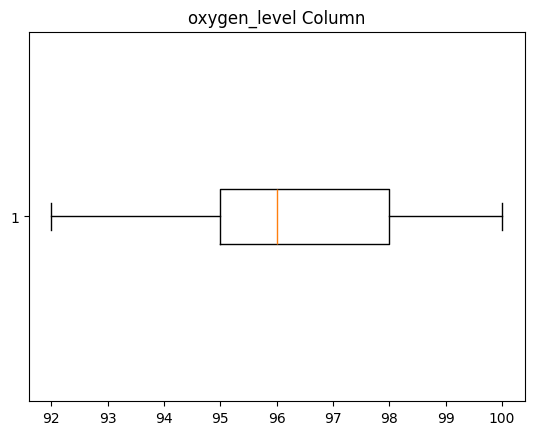

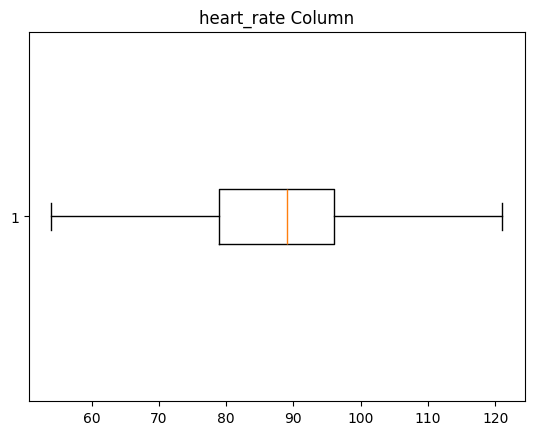

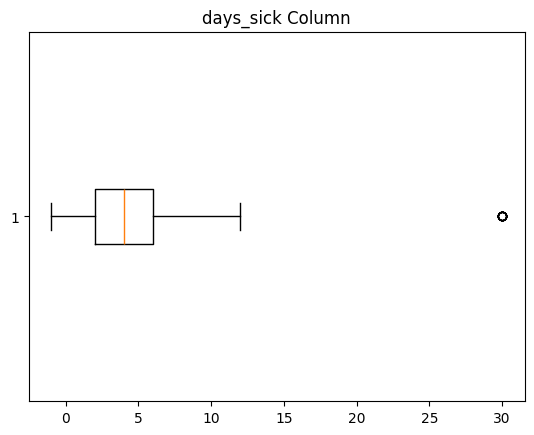

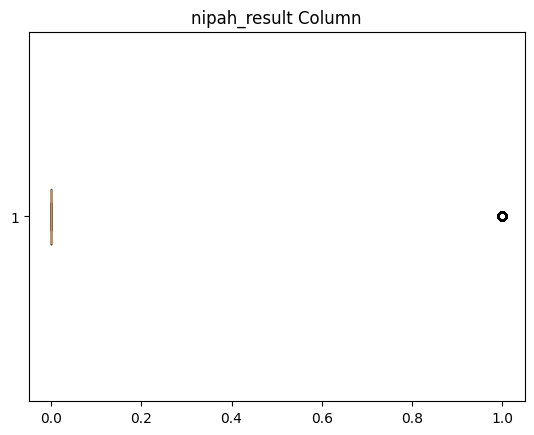

In [7]:
#Lets Recheck the OutLiers of the all the columns.

column_list = ['age','temperature', 'oxygen_level', 'heart_rate',
       'days_sick','nipah_result']

plt.figure(figsize=(8,4))
for i in column_list:
    plt.boxplot(df[i], vert=False)
    plt.title(f"{i} Column")
    plt.savefig(f"OutLiers_graphs/After_emoving_Outliers/{i}_removed_outliers.png",dpi=100,bbox_inches='tight')
    plt.show()

In [11]:
#Lets convert the All the Categorical data into the numaric formate.
#WE are scal down of this all the columns.

temp2 = []
temp3 = []

for i in df.columns:
    if df[i].dtype == "object":
        temp2.append(i)
    else:
        temp3.append(i)


In [12]:
#Convert the Categorical to numaric. Using the LabelEncoder We are encode the all the categoricle data
encoder = {}

for i in temp2:
    lb = LabelEncoder()
    df[i] = lb.fit_transform(df[i])
    encoder[i] = lb
print("Dat Encoding Is Completed....")

Dat Encoding Is Completed....


In [ ]:
#Lets Use th train test Split for the Data

x = df.iloc[:,:-1]
y = df["nipah_result"]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

print("The train test split and the column division is completed.....")

0       1
1       0
2       0
3       0
5       0
       ..
3195    1
3196    0
3197    0
3198    0
3199    0
Name: nipah_result, Length: 2785, dtype: int64

In [13]:
#Lets scal down all the columns and make the data into like the machine understandable formate.

std = StandardScaler()

x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

print("The Scaling of the datset is now conpleted................")

The Scaling of the datset is now conpleted................


In [ ]:
#Lets use the Random Forest Regressor.


NameError: name 'x_train_scaled' is not defined